## Improvement of regression model and increase its predictive power. 
### Here are several ways:

- Include additional independent variables: One way to improve the model is to include additional independent variables that may have an impact on the dependent variable. For example, if you are trying to predict the price of a house, you could include variables such as the size of the house, the number of bedrooms, the neighborhood, and so on.

- Transform the dependent variable: Sometimes transforming the dependent variable can improve the fit of the model. For example, if the dependent variable is skewed or has a non-normal distribution, applying a logarithmic or square root transformation may improve the model's fit.

- Remove outliers: Outliers in the data can skew the results of the regression analysis and reduce the accuracy of the model. Removing outliers can improve the fit of the model and increase its predictive power.

- Use a different type of regression: There are several types of regression models, such as logistic regression, polynomial regression, and Ridge regression. Depending on the nature of the data and the research question, using a different type of regression model may improve the fit of the model and increase its predictive power.

- Increase the sample size: A larger sample size can improve the accuracy of the regression model and increase its predictive power. If possible, collecting additional data or expanding the sample size may improve the fit of the model.

In [2]:
# import packages
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
# read custom correct data
mrg = pd.read_excel('results/merged_m.xlsx')
mrg.head(2)

,Rank,Country,Quality_of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Cost_of_Living_Index,Property_Price_to_Income_Ratio,Traffic_Commute_Time_Index,Pollution_Index,Climate_Index,Region
0,1,Netherlands,196.7,107.8,72.7,77.1,68.6,7.2,25.5,23.7,86.8,Western_Europe
1,2,Denmark,194.7,105.0,73.4,79.2,78.6,6.6,28.5,21.3,81.8,Northern_Europe


### Check the normality of data

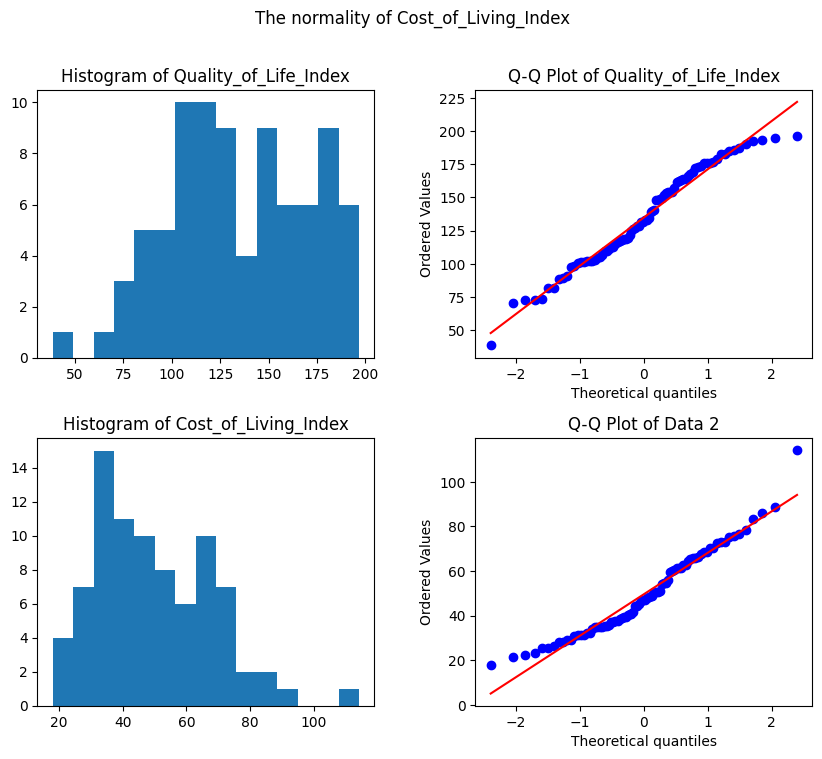

In [16]:
# check the destribution of the data
import pylab 
import scipy.stats as stats

val1 = mrg['Quality_of_Life_Index']
name1 = 'Quality_of_Life_Index'
val2 = mrg['Cost_of_Living_Index']
name2 = 'Cost_of_Living_Index'

# Create a figure 
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(val1, bins=15)
axs[0, 0].set_title("Histogram of "+str(name1))

stats.probplot(val1, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("Q-Q Plot of "+str(name1))

axs[1, 0].hist(val2, bins=15)
axs[1, 0].set_title("Histogram of "+str(name2))

stats.probplot(val2, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("Q-Q Plot of Data 2")

# Add a main title to the figure
fig.suptitle("The normality of "+str(name2))
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.savefig('results/Normality.png', dpi=300, bbox_inches='tight')

In [30]:
# Perform a Shapiro-Wilk test
shapiro_stat, shapiro_pval = stats.shapiro(val1)
print("Shapiro-Wilk Test:")
print(f"Test statistic: {shapiro_stat:.4f}")
print(f"p-value: {shapiro_pval:.4f}")
print('---------------------')
if shapiro_pval < 0.05:
    print("NORMAL destribution") #The null hypothesis can be rejected.
else:
    print("NOT NORMAL destribution") #The null hypothesis cannot be rejected.
print('\n')

# Perform a Kolmogorov-Smirnov test
ks_stat, ks_pval = stats.kstest(val1, 'norm')
print("Kolmogorov-Smirnov Test:")
print(f"Test statistic: {ks_stat:.4f}")
print(f"p-value: {ks_pval:.4f}")
print('---------------------')
if ks_pval < 0.05:
    print("NORMAL destribution") #The null hypothesis can be rejected.
else:
    print("NOT NORMAL destribution") #The null hypothesis cannot be rejected.
print('\n')

# Perform an Anderson-Darling test
ad_stat, ad_crit_vals, ad_sig_lvls = stats.anderson(val1, dist='norm')
print("Anderson-Darling Test:")
print(f"Test statistic: {ad_stat:.4f}")
print(f"Critical values: {ad_crit_vals}")
print(f"Significance levels: {ad_sig_lvls}")
print('---------------------')
if ad_stat < 0.05:
    print("NORMAL destribution") #The null hypothesis can be rejected.
else:
    print("NOT NORMAL destribution") #The null hypothesis cannot be rejected.
print('\n')

Shapiro-Wilk Test:
Test statistic: 0.9719
p-value: 0.0631
---------------------
NOT NORMAL destribution


Kolmogorov-Smirnov Test:
Test statistic: 1.0000
p-value: 0.0000
---------------------
NORMAL destribution


Anderson-Darling Test:
Test statistic: 0.6938
Critical values: [0.552 0.628 0.754 0.879 1.046]
Significance levels: [15.  10.   5.   2.5  1. ]
---------------------
NOT NORMAL destribution




- Shapiro-Wilk Test: 

This test is commonly used when the sample size is small to moderate (less than 2000 observations). A p-value greater than the significance level (e.g., 0.05) indicates that there is no evidence to reject the null hypothesis that the data is normally distributed.

- Kolmogorov-Smirnov Test: 

This test is commonly used when the sample size is large (greater than 2000 observations). A p-value less than the significance level indicates that there is evidence to reject the null hypothesis that the data is normally distributed.

- Anderson-Darling Test: 

This test is also commonly used when the sample size is small to moderate (less than 2000 observations). The test statistic is compared to critical values at various significance levels. If the test statistic is less than the critical value at a given significance level, then there is no evidence to reject the null hypothesis that the data is normally distributed.-